# What are AI Agents?

### Definition

**AI Agents** are autonomous, goal-driven programs or systems that perceive their environment, make decisions, and take actions to achieve specific objectives—often using artificial intelligence techniques such as machine learning, reasoning, and planning. In the context of language models and modern AI, an agent is typically an LLM-powered entity that can interact with external tools, APIs, or environments to accomplish complex, multi-step tasks.
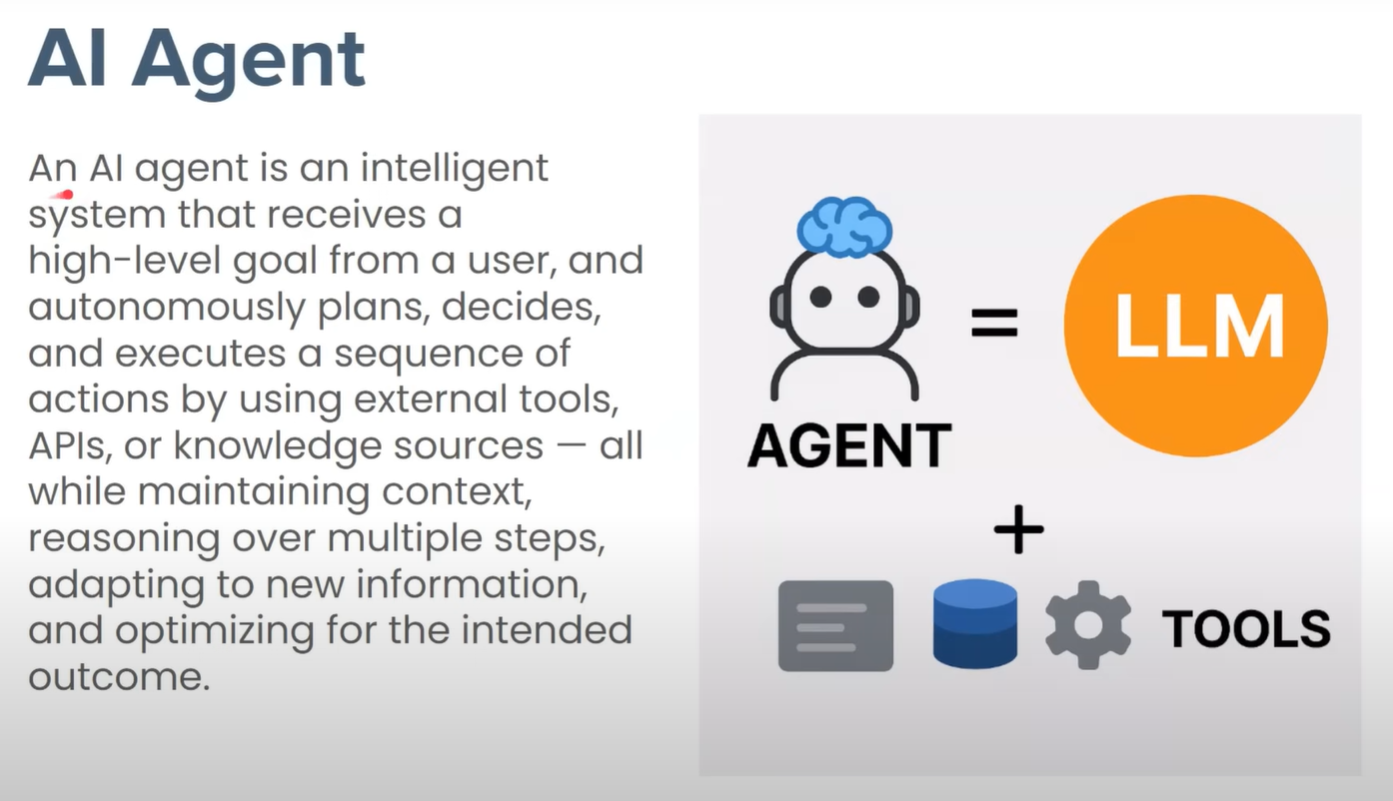
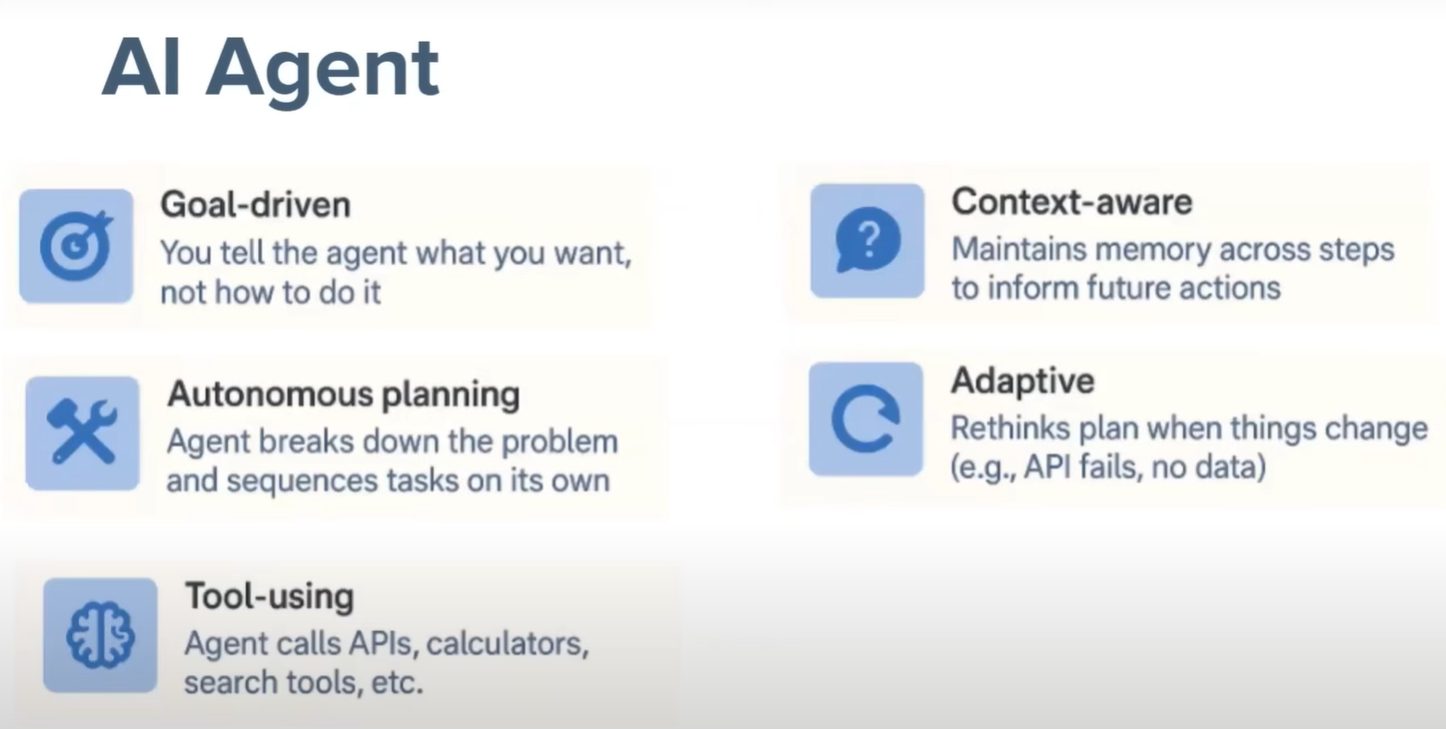
### Key Characteristics

- **Autonomy:** Operate independently, making decisions without constant human intervention.
- **Perception:** Observe or receive information from the environment (user input, APIs, sensors, etc.).
- **Reasoning & Planning:** Decide what actions to take based on their goals and current state.
- **Action:** Interact with the environment—calling APIs, retrieving data, controlling software, etc.
- **Adaptivity:** Learn from feedback and adapt their behavior over time (in some architectures).

### Types of AI Agents

- **Reactive Agents:** Respond directly to inputs with actions (no memory).
- **Deliberative/Planning Agents:** Build and use internal models to reason about the future.
- **Learning Agents:** Improve performance based on experience and feedback.
- **LLM Agents (Modern):** Use language models (e.g., GPT-4) to reason, plan, and call tools/APIs for tasks like RAG, workflow automation, and more.

### AI Agents in LangChain & LLM Ecosystem

In frameworks like LangChain, agents are LLM-powered orchestrators that:
- Receive user goals/instructions.
- Decide which tools or APIs to call (tool calling).
- Manage multi-step workflows, memory, and context.
- Generate final outputs, explanations, or actions.

**Example:**  
A customer support agent receives a question, queries a database, summarizes the answer, and replies—all autonomously.

### Example Workflow

1. **User:** "Book me a flight to Paris and summarize the weather there."
2. **Agent:**
   - Searches flight APIs for options.
   - Calls a weather tool for Paris.
   - Summarizes both results and presents them to the user.
   
**Summary:**  
AI Agents are autonomous software entities that use perception, reasoning, and action—often powered by LLMs—to accomplish complex tasks, interact with external systems, and automate workflows.

## **1. ReAct**

ReAct is a design pattern used in AI agents that stands for **Reasoning + Acting**. It allows a language model (**LLM**) to interleave internal reasoning (**Thought**) with external actions (**like tool use**) in a structured, multi-step process.

Instead of generating an answer in one go, the model thinks step by step, deciding what it needs to do next and optionally calling tools (**APIs, calculators, web search, etc.**) to help it.

> **Thought:** I need to find the capital of France.  
> **Action:** search_tool  
> **Action Input:** "capital of France"  
> **Observation:** Paris  
> **Thought:** Now I need the population of Paris.  
> **Action:** search_tool  
> **Action Input:** "population of Paris"  
> **Observation:** 2.1 million  
> **Thought:** I now know the final answer.  
> **Final Answer:** Paris is the capital of France and has a population of approximately 2.1 million.

ReAct is useful for:
- Multi-step problems
- Tool-augmented tasks (web search, database lookup, etc.)
- Making the agent’s reasoning **transparent** and **auditable**

It was first introduced in the paper:
> *"ReAct: Synergizing Reasoning and Acting in Language Models"* (Yao et al., 2022)

> ReAct: **Synergizing Reasoning and Acting in Language Models**

## **2. Agent & Agent Executor**

- 
  *Agent* 

- 
  *Agent Executor* 

**AgentExecutor** orchestrates the entire loop:
1. Sends inputs and previous messages to the agent
2. Gets the **next action** from agent
3. Executes that tool with provided input
4. Adds the tool’s **observation** back into the history
5. Loops again with updated history until the agent says **Final Answer**.

## **3. [Creating an Agent](https://smith.langchain.com/hub)**

```python  
agent = create_react_agent(  
    llm=llm,  
    tools=[search_tool],  
    prompt=prompt  
)  

## **4. Creating an Agent Executor**

```python  
agent_executor = AgentExecutor(  
    agent=agent,  
    tools=[search_tool],  
    verbose=True  
)  

## **5. Flow Chart**

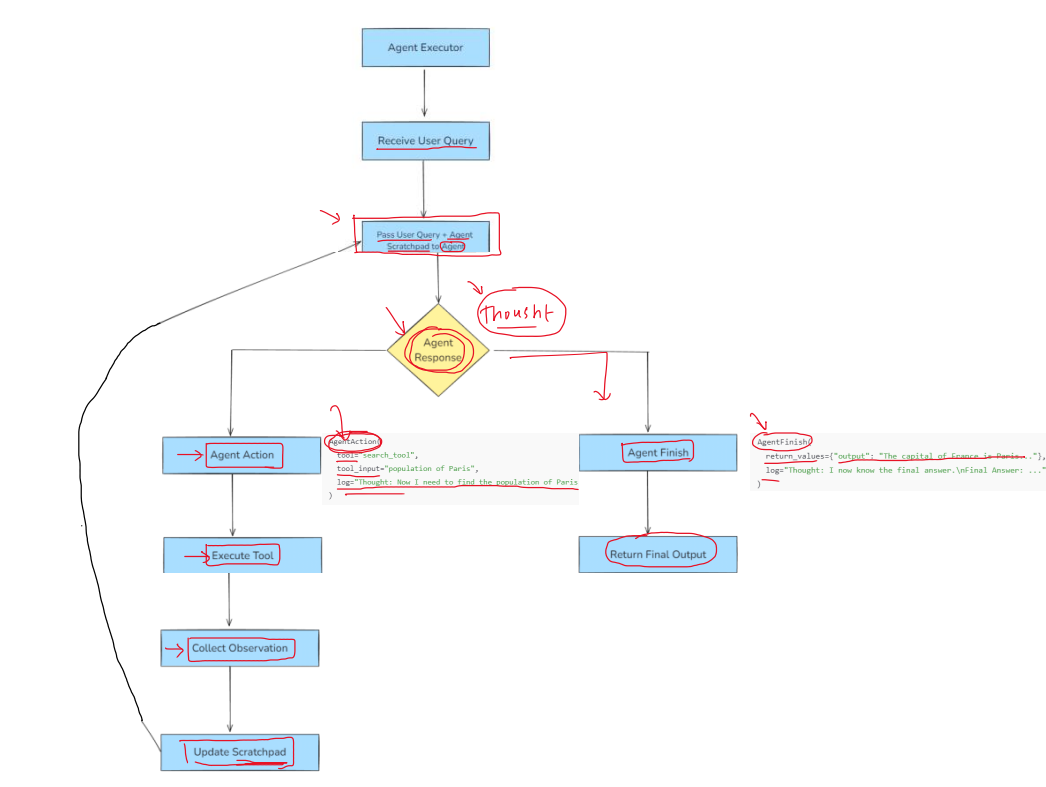

## **6. Example**

#### Input Query:  
> "What is the capital of France and what is its population?"  

Answer the following questions as best you can. You have access to the following tools:  
`search_tool`: Useful for answering general knowledge questions by querying a search API.  

Use the following format:  
- **Question**: the input question you must answer  
- **Thought**: you should always think about what to do  
- **Action**: the action to take, should be one of `[search_tool]`  
- **Action Input**: the input to the action  
- **Observation**: the result of the action  
- ... (this Thought/Action/Action Input/Observation can repeat N times)  
- **Thought**: I now know the final answer  
- **Final Answer**: the final answer to the original input question  

Begin!  

Question: What is the capital of France and what is its population?  
Thought:  

---  

Thought: I need to find the capital of France **first**.  
**Action:** search_tool  
**Action Input:** "capital of France"

```python  
AgentAction(  
    tool="search_tool",  
    tool_input="capital of France",  
    log="Thought: I need to find the capital of France first."  
)  

observation = search_tool("capital of France") __________   Result: "Paris is the capital of France." <br>
**Thought:** I need to find the capital of France first.  
**Action:** search_tool  
**Action Input:** "capital of France"  
**Observation:** Paris is the capital of France.

### **Current state so far:**
- User Input: `What is the capital of France and what is its population?`
- #### **Agent Scratchpad after step 2:**
**Question:** What is the capital of France and what is its population?  
**Thought:** I need to find the capital of France first.  
**Action:** search_tool  
**Action Input:** "capital of France"  
**Observation:** Paris is the capital of France.

Answer the following questions as best you can. You have access to the following tools:  
- `search_tool`: Useful for answering general knowledge questions by querying a search API.

Use the following format:
- **Question**: the input question you must answer  
- **Thought**: you should always think about what to do  
- **Action**: the action to take, should be one of `[search_tool]`  
- **Action Input**: the input to the action  
- **Observation**: the result of the action  
- ... (this Thought/Action/Action Input/Observation can repeat N times)  
- **Thought**: I now know the final answer  
- **Final Answer**: the final answer to the original input question

Begin!

Question: What is the capital of France and what is its population?  
Thought: I need to find the capital of France first.  
**Action:** search_tool  
**Action Input:** "capital of France"  
**Observation:** Paris is the capital of France.

---

Thought: Now I need to find the population of Paris.  
**Action:** search_tool  
**Action Input:** "population of Paris"  

```python
AgentAction
tool="search_tool",
tool_input="population of Paris",


AgentAction
tool="search_tool",
tool_input="population of Paris",
log="Thought: Now I need to find the population of Paris."
)
```
observation = search_tool("population of Paris")                        "Paris has a population of approximately 2.1 million."

Answer the following questions as best you can. You have access to the following tools:

search_tool: Useful for answering general knowledge questions by querying a search API.

Use the following format:

Question: the input question you must answer  
Thought: you should always think about what to do  
Action: the action to take, should be one of [search_tool]  
Action Input: the input to the action  
Observation: the result of the action  
... (this Thought/Action/Action Input/Observation can repeat N times)  
Thought: I now know the final answer  
Final Answer: the final answer to the original input question

Begin!

Question: What is the capital of France and what is its population?  
Thought: I need to find the capital of France first.  
Action: search_tool  
Action Input: "capital of France"  
Observation: Paris is the capital of France.  
Thought: Now I need to find the population of Paris.  
Action: search_tool  
Action Input: "population of Paris"  
Observation: Paris has a population of approximately 2.1 million.  
Thought: I now have the information needed to answer.  
Final Answer: The capital of France is Paris, and its population is approximately 2.1 million.

Thought: I now know the final answer.  
Final Answer: Paris is the capital of France and has a population of approximately 2.1 million.

Thought: I now know the final answer.  
Final Answer: Paris is the capital of France and has a population of approximately 2.1 million.

```python
AgentFinish(
    return_values={"output": "The capital of France is Paris..."},
    log="Thought: I now know the final answer.\nFinal Answer: ..."
)

{
    "output": "Paris is the capital of France and has a population of approximately 2.1 million."
}
```